In [1]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev

In [2]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev

In [3]:
# for pipelined data
import emeval.analysed.phone_view as eapv

In [4]:
import pandas as pd

In [5]:
import geopandas as gpd
import shapely as shp

In [6]:
import numpy as np

In [7]:
import emeval.metrics.dist_calculations as emd

In [8]:
# For plots
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Analytics results
import emeval.metrics.segmentation as ems

In [10]:
# for statistics
import scipy as sp
import scipy.stats as spst 

In [11]:
# For easier debugging while working on modules
import importlib

In [12]:
import sys 

In [13]:
sys.path.append('/Users/gkosmach/Documents/every_trip_counts/e-mission-server')

In [14]:
import emission.analysis.intake.cleaning.location_smoothing as eaicl

storage not configured, falling back to sample, default configuration
URL not formatted, defaulting to "Stage_database"
Connecting to database URL localhost


In [15]:
# json
import json

In [16]:
def import_sd_and_pv_from_server(trips  = ["unimodal_trip_car_bike_mtv_la", "car_scooter_brex_san_jose", "train_bus_ebike_mtv_ucb"], 
                                 AUTHOR_EMAIL  = "shankari@eecs.berkeley.edu", 
                                 DATASTORE_LOC = "http://localhost:8080", 
                                 pkl_file_name = None):
    sd_l = []
    pv_l = []
    for trip in trips:
        sd = eisd.ServerSpecDetails(DATASTORE_LOC, AUTHOR_EMAIL, trip)
        pv = eipv.PhoneView(sd)
        sd_l.append(sd)
        pv_l.append(pv)
    if pkl_file_name:
        import pickle
        with open(pkl_file_name, 'wb') as outp:
            for pv in pv_l:
                pickle.dump(pv, outp, pickle.HIGHEST_PROTOCOL)
    return sd_l, pv_l

In [17]:
def import_pv_from_pkl(pkl_file_name, 
                       trips = ["unimodal_trip_car_bike_mtv_la", "car_scooter_brex_san_jose", "train_bus_ebike_mtv_ucb"]):
    import pickle
    pv_l = []
    with open('pv.pkl', 'rb') as inp:
        for trip in trips:
            pv_l.append(pickle.load(inp))
    return pv_l

In [18]:
(pv_la, pv_sj, pv_ucb) = import_pv_from_pkl('pv.pkl')

In [19]:
av_la = eapv.create_analysed_view(pv_la, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")
av_sj = eapv.create_analysed_view(pv_sj, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")
av_ucb = eapv.create_analysed_view(pv_ucb, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/cleaned_section")

Finished copying unimodal_trip_car_bike_mtv_la, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
Retrieving data for ucb-sdb-android-1 from 1563606000 -> 1657577704.078876
Retrieving data for: post_body={'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563606000, 'end_time': 1657577704.078876}
response=<Response [200]>
Found 82 entries
Retrieving data for ucb-sdb-android-1 from 1655748331.215638 -> 1657577704.078876
Retrieving data for: post_body={'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1655748331.215638, 'end_time': 1657577704.078876}
response=<Response [200]>
Found 1 entries

response=<Response [200]>
Found 11996 entries
Retrieving data for ucb-sdb-android-2 from 1655760626.848227 -> 1657577704.656129
Retrieving data for: post_body={'user': 'ucb-sdb-android-2', 'key_list': ['analysis/recreated_location'], 'start_time': 1655760626.848227, 'end_time': 1657577704.656129}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-2 from 1563606000 -> 1657577708.747419
Retrieving data for: post_body={'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1657577708.747419}
response=<Response [200]>
Found 172 entries
Retrieving data for ucb-sdb-android-2 from 1655760622.5240479 -> 1657577708.747419
Retrieving data for: post_body={'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655760622.5240479, 'end_time': 1657577708.747419}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-2 from 1563606000 -> 1657577708.967954
Retrieving data for

Before filtering, trips = [('2019-06-19T14:13:22.042000-07:00', '2019-06-19T14:40:39-07:00'), ('2019-06-21T09:52:45.337000-07:00', '2019-06-21T10:04:41.606000-07:00'), ('2019-06-21T11:50:40-07:00', '2019-06-21T11:55:52-07:00'), ('2019-07-12T10:08:30-07:00', '2019-07-12T10:12:46-07:00'), ('2019-07-12T10:13:17-07:00', '2019-07-12T10:16:28-07:00'), ('2019-07-18T15:55:33-07:00', '2019-07-18T16:04:01-07:00'), ('2019-07-18T16:04:02-07:00', '2019-07-18T16:06:15-07:00'), ('2019-07-18T16:06:16-07:00', '2019-07-18T16:06:40-07:00'), ('2019-07-18T16:06:42-07:00', '2019-07-18T16:14:17-07:00'), ('2019-07-18T16:16:45-07:00', '2019-07-18T16:25:01-07:00'), ('2019-07-18T16:25:02.700000-07:00', '2019-07-18T16:40:23-07:00'), ('2019-07-18T18:06:50.622811-07:00', '2019-07-18T18:26:23-07:00'), ('2019-07-18T18:26:24-07:00', '2019-07-18T18:35:08-07:00'), ('2019-07-18T18:35:09-07:00', '2019-07-18T18:46:12-07:00'), ('2019-07-19T10:52:37-07:00', '2019-07-19T11:05:34-07:00'), ('2019-07-19T11:05:35-07:00', '2019-07

response=<Response [200]>
Found 12795 entries
Retrieving data for ucb-sdb-android-3 from 1655764692.407965 -> 1657577709.545595
Retrieving data for: post_body={'user': 'ucb-sdb-android-3', 'key_list': ['analysis/recreated_location'], 'start_time': 1655764692.407965, 'end_time': 1657577709.545595}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-3 from 1563606000 -> 1657577713.339624
Retrieving data for: post_body={'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1657577713.339624}
response=<Response [200]>
Found 174 entries
Retrieving data for ucb-sdb-android-3 from 1655764686.870524 -> 1657577713.339624
Retrieving data for: post_body={'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655764686.870524, 'end_time': 1657577713.339624}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-3 from 1563606000 -> 1657577713.595032
Retrieving data for: 

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_2 HAHFDC v/s HAMFDC HAMFDC_2 2
Before filtering, trips = [('2019-06-19T14:13:32-07:00', '2019-06-19T14:41:05-07:00'), ('2019-06-21T11:48:53-07:00', '2019-06-21T11:56:31-07:00'), ('2019-06-21T15:29:54.764000-07:00', '2019-06-21T15:33:59-07:00'), ('2019-06-21T16:13:51.443866-07:00', '2019-06-21T16:20:33-07:00'), ('2019-06-21T16:24:42.645606-07:00', '2019-06-21T18:53:16.074000-07:00'), ('2019-07-12T10:05:51.634187-07:00', '2019-07-12T10:15:04-07:00'), ('2019-07-12T10:18:04.123513-07:00', '2019-07-12T10:20:24-07:00'), ('2019-07-18T16:03:30.668000-

Before filtering, trips = [('2019-06-19T14:13:32-07:00', '2019-06-19T14:41:05-07:00'), ('2019-06-21T11:48:53-07:00', '2019-06-21T11:56:31-07:00'), ('2019-06-21T15:29:54.764000-07:00', '2019-06-21T15:33:59-07:00'), ('2019-06-21T16:13:51.443866-07:00', '2019-06-21T16:20:33-07:00'), ('2019-06-21T16:24:42.645606-07:00', '2019-06-21T16:33:22.660000-07:00'), ('2019-06-21T16:37:39-07:00', '2019-06-21T16:39:41.143000-07:00'), ('2019-06-21T16:40:46.365000-07:00', '2019-06-21T16:41:49.506000-07:00'), ('2019-06-21T16:47:45.051000-07:00', '2019-06-21T16:51:26.575000-07:00'), ('2019-06-21T17:00:16-07:00', '2019-06-21T17:12:19-07:00'), ('2019-06-21T17:12:49-07:00', '2019-06-21T17:16:59.668000-07:00'), ('2019-06-21T17:18:41-07:00', '2019-06-21T18:28:36-07:00'), ('2019-06-21T18:29:06-07:00', '2019-06-21T18:53:16.074000-07:00'), ('2019-07-12T10:05:51.634187-07:00', '2019-07-12T10:12:43-07:00'), ('2019-07-12T10:13:15-07:00', '2019-07-12T10:15:04-07:00'), ('2019-07-12T10:18:04.123513-07:00', '2019-07-12T

response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-4 from 1563606000 -> 1657577715.71487
Retrieving data for: post_body={'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1657577715.71487}
response=<Response [200]>
Found 6 entries
Retrieving data for ucb-sdb-android-4 from 1655764852.8971462 -> 1657577715.71487
Retrieving data for: post_body={'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1655764852.8971462, 'end_time': 1657577715.71487}
response=<Response [200]>
Found 1 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transi

response=<Response [200]>
Found 179 entries
Retrieving data for ucb-sdb-ios-1 from 1655765021.3378692 -> 1657577715.872424
Retrieving data for: post_body={'user': 'ucb-sdb-ios-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1655765021.3378692, 'end_time': 1657577715.872424}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-ios-1 from 1563606000 -> 1657577715.973214
Retrieving data for: post_body={'user': 'ucb-sdb-ios-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1657577715.973214}
response=<Response [200]>
Found 7 entries
Retrieving data for ucb-sdb-ios-1 from 1655765020.978334 -> 1657577715.973214
Retrieving data for: post_body={'user': 'ucb-sdb-ios-1', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655765020.978334, 'end_time': 1657577715.973214}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-ios-1 from 1563606000 -> 1657577716.02618
Retrieving data for: post_body={'user': 'ucb-sdb-ios

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed:ACCURACY_CONTROL_4 HAHFDC v/s HAMFDC accuracy_control_1 2
Before filtering, trips = [('2019-06-21T07:54:37.402644-07:00', '2019-06-21T08:03:12.998210-07:00'), ('2019-06-21T09:54:01.274519-07:00', '2019-06-21T10:07:03.991278-07:00'), ('2019-06-21T10:57:32.626916-07:00', '2019-06-21T11:05:14.993758-07:00'), ('2019-06-21T11:47:37.377343-07:00', '2019-06-21T12:00:44.998291-07:00'), ('2019-06-21T15:27:32.942929-07:00', '2019-06-21T15:34:53.995085-07:00'), ('2019-06-21T16:14:12.935650-07:00', '2019-06-21T16:32:12.144650-07:00'), ('2019-07-12T10:06:29.825268-07:00', '2

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s HAMFDC:HAHFDC_2 HAHFDC v/s HAMFDC HAHFDC_2 2
Before filtering, trips = [('2019-06-19T14:16:16.586914-07:00', '2019-06-19T14:50:51.988175-07:00'), ('2019-06-19T15:03:03.258420-07:00', '2019-06-19T15:14:04.996495-07:00'), ('2019-06-19T16:47:51.154749-07:00', '2019-06-19T17:02:20.989934-07:00'), ('2019-06-19T18:58:04.875024-07:00', '2019-06-19T19:13:21.999279-07:00'), ('2019-06-21T07:51:03.140002-07:00', '2019-06-21T08:04:12.995818-07:00'), ('2019-06-21T11:47:41.075602-07:00', '2019-06-21T12:04:25.995581-07:00'), ('2019-06-21T12:26:29.816319-07:00', '2019-06-2

response=<Response [200]>
Found 11685 entries
Retrieving data for ucb-sdb-ios-3 from 1655765735.6815438 -> 1657577720.760094
Retrieving data for: post_body={'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/recreated_location'], 'start_time': 1655765735.6815438, 'end_time': 1657577720.760094}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-ios-3 from 1563606000 -> 1657577724.173896
Retrieving data for: post_body={'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1657577724.173896}
response=<Response [200]>
Found 100 entries
Retrieving data for ucb-sdb-ios-3 from 1655765734.756284 -> 1657577724.173896
Retrieving data for: post_body={'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655765734.756284, 'end_time': 1657577724.173896}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-ios-3 from 1563606000 -> 1657577724.33335
Retrieving data for: post_body={'user': 'ucb-sdb

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_2 HAHFDC v/s HAMFDC HAMFDC_2 2
Before filtering, trips = [('2019-06-19T14:16:07.744506-07:00', '2019-06-19T14:42:28.989396-07:00'), ('2019-06-19T15:04:27.431708-07:00', '2019-06-19T15:11:59.984994-07:00'), ('2019-06-19T16:48:51.988024-07:00', '2019-06-19T17:01:27.989144-07:00'), ('2019-06-19T18:57:56.388647-07:00', '2019-06-19T19:12:42.997152-07:00'), ('2019-06-21T07:54:09.506301-07:00', '2019-06-21T08:03:10.996361-07:00'), ('2019-06-21T09:53:57.000253-07:00', '2019-06-21T10:06:55.986031-07:00'), ('2019-06-21T11:45:32.725421-07:00', '2019-06-2

response=<Response [200]>
Found 5 entries
Retrieving data for ucb-sdb-ios-4 from 1655765755.889224 -> 1657577725.088739
Retrieving data for: post_body={'user': 'ucb-sdb-ios-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1655765755.889224, 'end_time': 1657577725.088739}
response=<Response [200]>
Found 1 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s MAHFDC power_control_0 2
Before filtering, trips = [('2019-06-21T07:54:10.435970-07:00', '2019-06-21T08:03:31.997930-07:00'), ('2019-06-21T09:54:40.040418-07:00', '2019-06-21T10:13:52.827565-07:00'), ('2019-06-21T11:

Finished copying car_scooter_brex_san_jose, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
Retrieving data for ucb-sdb-android-1 from 1563606000 -> 1657577736.424288
Retrieving data for: post_body={'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563606000, 'end_time': 1657577736.424288}
response=<Response [200]>
Found 82 entries
Retrieving data for ucb-sdb-android-1 from 1655748331.215638 -> 1657577736.424288
Retrieving data for: post_body={'user': 'ucb-sdb-android-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1655748331.215638, 'end_time': 1657577736.424288}
response=<Response [200]>
Found 1 entries
Ret

response=<Response [200]>
Found 11996 entries
Retrieving data for ucb-sdb-android-2 from 1655760626.848227 -> 1657577736.796395
Retrieving data for: post_body={'user': 'ucb-sdb-android-2', 'key_list': ['analysis/recreated_location'], 'start_time': 1655760626.848227, 'end_time': 1657577736.796395}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-2 from 1563606000 -> 1657577742.309222
Retrieving data for: post_body={'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1657577742.309222}
response=<Response [200]>
Found 172 entries
Retrieving data for ucb-sdb-android-2 from 1655760622.5240479 -> 1657577742.309222
Retrieving data for: post_body={'user': 'ucb-sdb-android-2', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655760622.5240479, 'end_time': 1657577742.309222}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-2 from 1563606000 -> 1657577742.499341
Retrieving data for

Before filtering, trips = [('2019-06-19T14:13:22.042000-07:00', '2019-06-19T14:40:39-07:00'), ('2019-06-21T09:52:45.337000-07:00', '2019-06-21T10:04:41.606000-07:00'), ('2019-06-21T11:50:40-07:00', '2019-06-21T11:55:52-07:00'), ('2019-07-12T10:08:30-07:00', '2019-07-12T10:16:28-07:00'), ('2019-07-18T15:55:33-07:00', '2019-07-18T16:14:17-07:00'), ('2019-07-18T16:16:45-07:00', '2019-07-18T16:40:23-07:00'), ('2019-07-18T18:06:50.622811-07:00', '2019-07-18T18:46:12-07:00'), ('2019-07-19T10:52:37-07:00', '2019-07-19T11:23:01-07:00'), ('2019-07-19T11:28:01.709046-07:00', '2019-07-19T12:39:26-07:00'), ('2019-07-19T12:47:55.787711-07:00', '2019-07-19T13:00:39.209000-07:00'), ('2019-07-19T14:24:41.988792-07:00', '2019-07-19T14:37:04-07:00'), ('2019-07-19T16:00:37.598402-07:00', '2019-07-19T16:06:59-07:00'), ('2019-07-19T16:11:28.271577-07:00', '2019-07-19T16:25:03-07:00'), ('2019-07-19T16:37:28.381695-07:00', '2019-07-19T17:38:08-07:00'), ('2019-07-19T17:41:27.349899-07:00', '2019-07-19T19:00:0

response=<Response [200]>
Found 12795 entries
Retrieving data for ucb-sdb-android-3 from 1655764692.407965 -> 1657577743.207126
Retrieving data for: post_body={'user': 'ucb-sdb-android-3', 'key_list': ['analysis/recreated_location'], 'start_time': 1655764692.407965, 'end_time': 1657577743.207126}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-3 from 1563606000 -> 1657577747.514217
Retrieving data for: post_body={'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1657577747.514217}
response=<Response [200]>
Found 174 entries
Retrieving data for ucb-sdb-android-3 from 1655764686.870524 -> 1657577747.514217
Retrieving data for: post_body={'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655764686.870524, 'end_time': 1657577747.514217}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-3 from 1563606000 -> 1657577747.707205
Retrieving data for: 

Before filtering, trips = [('2019-06-19T14:13:32-07:00', '2019-06-19T14:41:05-07:00'), ('2019-06-21T11:48:53-07:00', '2019-06-21T11:56:31-07:00'), ('2019-06-21T15:29:54.764000-07:00', '2019-06-21T15:33:59-07:00'), ('2019-06-21T16:13:51.443866-07:00', '2019-06-21T16:20:33-07:00'), ('2019-06-21T16:24:42.645606-07:00', '2019-06-21T16:33:22.660000-07:00'), ('2019-06-21T16:37:39-07:00', '2019-06-21T16:39:41.143000-07:00'), ('2019-06-21T16:40:46.365000-07:00', '2019-06-21T16:41:49.506000-07:00'), ('2019-06-21T16:47:45.051000-07:00', '2019-06-21T16:51:26.575000-07:00'), ('2019-06-21T17:00:16-07:00', '2019-06-21T17:12:19-07:00'), ('2019-06-21T17:12:49-07:00', '2019-06-21T17:16:59.668000-07:00'), ('2019-06-21T17:18:41-07:00', '2019-06-21T18:28:36-07:00'), ('2019-06-21T18:29:06-07:00', '2019-06-21T18:53:16.074000-07:00'), ('2019-07-12T10:05:51.634187-07:00', '2019-07-12T10:12:43-07:00'), ('2019-07-12T10:13:15-07:00', '2019-07-12T10:15:04-07:00'), ('2019-07-12T10:18:04.123513-07:00', '2019-07-12T

response=<Response [200]>
Found 372 entries
Retrieving data for ucb-sdb-android-4 from 1655764853.122614 -> 1657577748.370007
Retrieving data for: post_body={'user': 'ucb-sdb-android-4', 'key_list': ['analysis/recreated_location'], 'start_time': 1655764853.122614, 'end_time': 1657577748.370007}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-4 from 1563606000 -> 1657577748.540581
Retrieving data for: post_body={'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1657577748.540581}
response=<Response [200]>
Found 4 entries
Retrieving data for ucb-sdb-android-4 from 1655764852.527145 -> 1657577748.540581
Retrieving data for: post_body={'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655764852.527145, 'end_time': 1657577748.540581}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-4 from 1563606000 -> 1657577748.592394
Retrieving data for: post

Before filtering, trips = [('2019-06-21T07:53:16.979000-07:00', '2019-06-21T08:04:30-07:00'), ('2019-06-21T09:52:12.402000-07:00', '2019-06-21T10:04:04-07:00'), ('2019-06-21T11:52:03-07:00', '2019-06-21T11:58:06-07:00'), ('2019-06-21T16:12:36.093628-07:00', '2019-06-21T16:31:56.284000-07:00'), ('2019-06-21T16:37:36.256000-07:00', '2019-06-21T18:27:27.375000-07:00'), ('2019-06-21T18:30:05.224000-07:00', '2019-06-21T18:53:25.390000-07:00')]
Filter range = 2019-08-05T15:02:33.864901-07:00 -> 2019-08-05T16:19:14.399231-07:00
After filtering, trips = []
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed:POWER_CONTROL

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed:ACCURACY_CONTROL_6 MAMFDC v/s MAHFDC accuracy_control_0 2
Before filtering, trips = [('2019-06-21T07:54:37.402644-07:00', '2019-06-21T08:03:12.998210-07:00'), ('2019-06-21T09:54:01.274519-07:00', '2019-06-21T10:07:03.991278-07:00'), ('2019-06-21T10:57:32.626916-07:00', '2019-06-21T11:05:14.993758-07:00'), ('2019-06-21T11:47:37.377343-07:00', '2019-06-21T12:00:44.998291-07:00'), ('2019-06-21T15:27:32.942929-07:00', '2019-06-21T15:34:53.995085-07:00'), ('2019-06-21T16:14:12.935650-07:00', '2019-06-21T16:32:12.144650-07:00'), ('2019-07-12T10:06:29.825268-07:00', '2

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s HAMFDC:HAHFDC_1 HAHFDC v/s HAMFDC HAHFDC_1 2
Before filtering, trips = [('2019-06-19T14:16:16.586914-07:00', '2019-06-19T14:50:51.988175-07:00'), ('2019-06-19T15:03:03.258420-07:00', '2019-06-19T15:14:04.996495-07:00'), ('2019-06-19T16:47:51.154749-07:00', '2019-06-19T17:02:20.989934-07:00'), ('2019-06-19T18:58:04.875024-07:00', '2019-06-19T19:13:21.999279-07:00'), ('2019-06-21T07:51:03.140002-07:00', '2019-06-21T08:04:12.995818-07:00'), ('2019-06-21T11:47:41.075602-07:00', '2019-06-21T12:04:25.995581-07:00'), ('2019-06-21T12:26:29.816319-07:00', '2019-06-2

response=<Response [200]>
Found 11685 entries
Retrieving data for ucb-sdb-ios-3 from 1655765735.6815438 -> 1657577753.330881
Retrieving data for: post_body={'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/recreated_location'], 'start_time': 1655765735.6815438, 'end_time': 1657577753.330881}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-ios-3 from 1563606000 -> 1657577756.627092
Retrieving data for: post_body={'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563606000, 'end_time': 1657577756.627092}
response=<Response [200]>
Found 100 entries
Retrieving data for ucb-sdb-ios-3 from 1655765734.756284 -> 1657577756.627092
Retrieving data for: post_body={'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655765734.756284, 'end_time': 1657577756.627092}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-ios-3 from 1563606000 -> 1657577756.788763
Retrieving data for: post_body={'user': 'ucb-sd

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_1 HAHFDC v/s HAMFDC HAMFDC_1 2
Before filtering, trips = [('2019-06-19T14:16:07.744506-07:00', '2019-06-19T14:42:28.989396-07:00'), ('2019-06-19T15:04:27.431708-07:00', '2019-06-19T15:11:59.984994-07:00'), ('2019-06-19T16:48:51.988024-07:00', '2019-06-19T17:01:27.989144-07:00'), ('2019-06-19T18:57:56.388647-07:00', '2019-06-19T19:12:42.997152-07:00'), ('2019-06-21T07:54:09.506301-07:00', '2019-06-21T08:03:10.996361-07:00'), ('2019-06-21T09:53:57.000253-07:00', '2019-06-21T10:06:55.986031-07:00'), ('2019-06-21T11:45:32.725421-07:00', '2019-06-2

response=<Response [200]>
Found 5 entries
Retrieving data for ucb-sdb-ios-4 from 1655765755.773557 -> 1657577757.508079
Retrieving data for: post_body={'user': 'ucb-sdb-ios-4', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655765755.773557, 'end_time': 1657577757.508079}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-ios-4 from 1563606000 -> 1657577757.556291
Retrieving data for: post_body={'user': 'ucb-sdb-ios-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563606000, 'end_time': 1657577757.556291}
response=<Response [200]>
Found 5 entries
Retrieving data for ucb-sdb-ios-4 from 1655765755.889224 -> 1657577757.556291
Retrieving data for: post_body={'user': 'ucb-sdb-ios-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1655765755.889224, 'end_time': 1657577757.556291}
response=<Response [200]>
Found 1 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role

Before filtering, trips = [('2019-06-21T07:54:10.435970-07:00', '2019-06-21T08:03:31.997930-07:00'), ('2019-06-21T09:54:40.040418-07:00', '2019-06-21T10:13:52.827565-07:00'), ('2019-06-21T11:31:23.475080-07:00', '2019-06-21T12:11:49.996531-07:00'), ('2019-06-21T15:26:20.289034-07:00', '2019-06-21T15:35:36.994930-07:00'), ('2019-06-21T16:13:34.349776-07:00', '2019-06-21T16:34:40.058509-07:00')]
Filter range = 2020-03-04T15:34:28.447122-08:00 -> 2020-03-04T17:09:43.546934-08:00
After filtering, trips = []
Finished copying train_bus_ebike_mtv_ucb, starting overwrite
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
Retrieving data for ucb-sdb-android-1 from 1563260400 -> 1657577801.906

Before filtering, trips = [('2019-06-21T07:53:55.185000-07:00', '2019-06-21T08:04:25-07:00'), ('2019-06-21T09:52:10.847000-07:00', '2019-06-21T10:05:38.393000-07:00'), ('2019-06-21T11:49:53.232000-07:00', '2019-06-21T11:55:37-07:00'), ('2019-07-12T10:06:32-07:00', '2019-07-12T10:15:27-07:00')]
Filter range = 2019-07-26T14:16:33.511475-07:00 -> 2019-07-26T14:28:24.678987-07:00
After filtering, trips = []
Before filtering, trips = [('2019-06-21T07:53:55.185000-07:00', '2019-06-21T08:04:25-07:00'), ('2019-06-21T09:52:10.847000-07:00', '2019-06-21T10:05:38.393000-07:00'), ('2019-06-21T11:49:53.232000-07:00', '2019-06-21T11:55:37-07:00'), ('2019-07-12T10:06:32-07:00', '2019-07-12T10:15:27-07:00')]
Filter range = 2019-07-26T16:15:27.436353-07:00 -> 2019-07-26T19:59:48.141316-07:00
After filtering, trips = []
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_range

Before filtering, trips = [('2019-06-21T07:53:55.185000-07:00', '2019-06-21T08:04:25-07:00'), ('2019-06-21T09:52:10.847000-07:00', '2019-06-21T10:05:38.393000-07:00'), ('2019-06-21T11:49:53.232000-07:00', '2019-06-21T11:55:37-07:00'), ('2019-07-12T10:06:32-07:00', '2019-07-12T10:15:27-07:00')]
Filter range = 2019-11-19T13:30:58.939198-08:00 -> 2019-11-19T13:43:34.331953-08:00
After filtering, trips = []
Before filtering, trips = [('2019-06-21T07:53:55.185000-07:00', '2019-06-21T08:04:25-07:00'), ('2019-06-21T09:52:10.847000-07:00', '2019-06-21T10:05:38.393000-07:00'), ('2019-06-21T11:49:53.232000-07:00', '2019-06-21T11:55:37-07:00'), ('2019-07-12T10:06:32-07:00', '2019-07-12T10:15:27-07:00')]
Filter range = 2019-11-19T16:12:27.999223-08:00 -> 2019-11-19T19:15:38.499878-08:00
After filtering, trips = []
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_range

Before filtering, trips = [('2019-06-21T07:53:55.185000-07:00', '2019-06-21T08:04:25-07:00'), ('2019-06-21T09:52:10.847000-07:00', '2019-06-21T10:05:38.393000-07:00'), ('2019-06-21T11:49:53.232000-07:00', '2019-06-21T11:55:37-07:00'), ('2019-07-12T10:06:32-07:00', '2019-07-12T10:15:27-07:00')]
Filter range = 2020-02-06T08:13:39.145000-08:00 -> 2020-02-06T20:01:49.570000-08:00
After filtering, trips = []
Before filtering, trips = [('2019-06-21T07:53:55.185000-07:00', '2019-06-21T08:04:25-07:00'), ('2019-06-21T09:52:10.847000-07:00', '2019-06-21T10:05:38.393000-07:00'), ('2019-06-21T11:49:53.232000-07:00', '2019-06-21T11:55:37-07:00'), ('2019-07-12T10:06:32-07:00', '2019-07-12T10:15:27-07:00')]
Filter range = 2020-02-06T08:14:46.468857-08:00 -> 2020-02-06T10:30:08.723332-08:00
After filtering, trips = []
Before filtering, trips = [('2019-06-21T07:53:55.185000-07:00', '2019-06-21T08:04:25-07:00'), ('2019-06-21T09:52:10.847000-07:00', '2019-06-21T10:05:38.393000-07:00'), ('2019-06-21T11:49

Before filtering, trips = [('2019-06-19T14:13:22.042000-07:00', '2019-06-19T14:40:39-07:00'), ('2019-06-21T09:52:45.337000-07:00', '2019-06-21T10:04:41.606000-07:00'), ('2019-06-21T11:50:40-07:00', '2019-06-21T11:55:52-07:00'), ('2019-07-12T10:08:30-07:00', '2019-07-12T10:12:46-07:00'), ('2019-07-12T10:13:17-07:00', '2019-07-12T10:16:28-07:00'), ('2019-07-18T15:55:33-07:00', '2019-07-18T16:04:01-07:00'), ('2019-07-18T16:04:02-07:00', '2019-07-18T16:06:15-07:00'), ('2019-07-18T16:06:16-07:00', '2019-07-18T16:06:40-07:00'), ('2019-07-18T16:06:42-07:00', '2019-07-18T16:14:17-07:00'), ('2019-07-18T16:16:45-07:00', '2019-07-18T16:25:01-07:00'), ('2019-07-18T16:25:02.700000-07:00', '2019-07-18T16:40:23-07:00'), ('2019-07-18T18:06:50.622811-07:00', '2019-07-18T18:26:23-07:00'), ('2019-07-18T18:26:24-07:00', '2019-07-18T18:35:08-07:00'), ('2019-07-18T18:35:09-07:00', '2019-07-18T18:46:12-07:00'), ('2019-07-19T10:52:37-07:00', '2019-07-19T11:05:34-07:00'), ('2019-07-19T11:05:35-07:00', '2019-07

Before filtering, trips = [('2019-06-19T14:13:22.042000-07:00', '2019-06-19T14:40:39-07:00'), ('2019-06-21T09:52:45.337000-07:00', '2019-06-21T10:04:41.606000-07:00'), ('2019-06-21T11:50:40-07:00', '2019-06-21T11:55:52-07:00'), ('2019-07-12T10:08:30-07:00', '2019-07-12T10:12:46-07:00'), ('2019-07-12T10:13:17-07:00', '2019-07-12T10:16:28-07:00'), ('2019-07-18T15:55:33-07:00', '2019-07-18T16:04:01-07:00'), ('2019-07-18T16:04:02-07:00', '2019-07-18T16:06:15-07:00'), ('2019-07-18T16:06:16-07:00', '2019-07-18T16:06:40-07:00'), ('2019-07-18T16:06:42-07:00', '2019-07-18T16:14:17-07:00'), ('2019-07-18T16:16:45-07:00', '2019-07-18T16:25:01-07:00'), ('2019-07-18T16:25:02.700000-07:00', '2019-07-18T16:40:23-07:00'), ('2019-07-18T18:06:50.622811-07:00', '2019-07-18T18:26:23-07:00'), ('2019-07-18T18:26:24-07:00', '2019-07-18T18:35:08-07:00'), ('2019-07-18T18:35:09-07:00', '2019-07-18T18:46:12-07:00'), ('2019-07-19T10:52:37-07:00', '2019-07-19T11:05:34-07:00'), ('2019-07-19T11:05:35-07:00', '2019-07

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_2 HAHFDC v/s MAHFDC HAHFDC_2 3
Before filtering, trips = [('2019-06-19T14:13:22.042000-07:00', '2019-06-19T14:40:39-07:00'), ('2019-06-21T09:52:45.337000-07:00', '2019-06-21T10:04:41.606000-07:00'), ('2019-06-21T11:50:40-07:00', '2019-06-21T11:55:52-07:00'), ('2019-07-12T10:08:30-07:00', '2019-07-12T10:16:28-07:00'), ('2019-07-18T15:55:33-07:00', '2019-07-18T16:14:17-07:00'), ('2019-07-18T16:16:45-07:00', '2019-07-18T16:40:23-07:00'), ('2019-07-18T18:06:50.622811-07:00', '2019-07-18T18:46:12-07:00'), ('2019-07-19T10:52:37-07:00', '2019-07-19T1

Before filtering, trips = [('2019-06-19T14:13:22.042000-07:00', '2019-06-19T14:40:39-07:00'), ('2019-06-21T09:52:45.337000-07:00', '2019-06-21T10:04:41.606000-07:00'), ('2019-06-21T11:50:40-07:00', '2019-06-21T11:55:52-07:00'), ('2019-07-12T10:08:30-07:00', '2019-07-12T10:12:46-07:00'), ('2019-07-12T10:13:17-07:00', '2019-07-12T10:16:28-07:00'), ('2019-07-18T15:55:33-07:00', '2019-07-18T16:04:01-07:00'), ('2019-07-18T16:04:02-07:00', '2019-07-18T16:06:15-07:00'), ('2019-07-18T16:06:16-07:00', '2019-07-18T16:06:40-07:00'), ('2019-07-18T16:06:42-07:00', '2019-07-18T16:14:17-07:00'), ('2019-07-18T16:16:45-07:00', '2019-07-18T16:25:01-07:00'), ('2019-07-18T16:25:02.700000-07:00', '2019-07-18T16:40:23-07:00'), ('2019-07-18T18:06:50.622811-07:00', '2019-07-18T18:26:23-07:00'), ('2019-07-18T18:26:24-07:00', '2019-07-18T18:35:08-07:00'), ('2019-07-18T18:35:09-07:00', '2019-07-18T18:46:12-07:00'), ('2019-07-19T10:52:37-07:00', '2019-07-19T11:05:34-07:00'), ('2019-07-19T11:05:35-07:00', '2019-07

Filter range = 2019-12-09T13:59:01.664712-08:00 -> 2019-12-09T14:11:49.919419-08:00
After filtering, trips = ['2019-12-09T13:58:31.663882-08:00']
Before filtering, trips = [('2019-06-19T14:13:22.042000-07:00', '2019-06-19T14:40:39-07:00'), ('2019-06-21T09:52:45.337000-07:00', '2019-06-21T10:04:41.606000-07:00'), ('2019-06-21T11:50:40-07:00', '2019-06-21T11:55:52-07:00'), ('2019-07-12T10:08:30-07:00', '2019-07-12T10:12:46-07:00'), ('2019-07-12T10:13:17-07:00', '2019-07-12T10:16:28-07:00'), ('2019-07-18T15:55:33-07:00', '2019-07-18T16:04:01-07:00'), ('2019-07-18T16:04:02-07:00', '2019-07-18T16:06:15-07:00'), ('2019-07-18T16:06:16-07:00', '2019-07-18T16:06:40-07:00'), ('2019-07-18T16:06:42-07:00', '2019-07-18T16:14:17-07:00'), ('2019-07-18T16:16:45-07:00', '2019-07-18T16:25:01-07:00'), ('2019-07-18T16:25:02.700000-07:00', '2019-07-18T16:40:23-07:00'), ('2019-07-18T18:06:50.622811-07:00', '2019-07-18T18:26:23-07:00'), ('2019-07-18T18:26:24-07:00', '2019-07-18T18:35:08-07:00'), ('2019-07-18

Before filtering, trips = [('2019-06-19T14:13:22.042000-07:00', '2019-06-19T14:40:39-07:00'), ('2019-06-21T09:52:45.337000-07:00', '2019-06-21T10:04:41.606000-07:00'), ('2019-06-21T11:50:40-07:00', '2019-06-21T11:55:52-07:00'), ('2019-07-12T10:08:30-07:00', '2019-07-12T10:12:46-07:00'), ('2019-07-12T10:13:17-07:00', '2019-07-12T10:16:28-07:00'), ('2019-07-18T15:55:33-07:00', '2019-07-18T16:04:01-07:00'), ('2019-07-18T16:04:02-07:00', '2019-07-18T16:06:15-07:00'), ('2019-07-18T16:06:16-07:00', '2019-07-18T16:06:40-07:00'), ('2019-07-18T16:06:42-07:00', '2019-07-18T16:14:17-07:00'), ('2019-07-18T16:16:45-07:00', '2019-07-18T16:25:01-07:00'), ('2019-07-18T16:25:02.700000-07:00', '2019-07-18T16:40:23-07:00'), ('2019-07-18T18:06:50.622811-07:00', '2019-07-18T18:26:23-07:00'), ('2019-07-18T18:26:24-07:00', '2019-07-18T18:35:08-07:00'), ('2019-07-18T18:35:09-07:00', '2019-07-18T18:46:12-07:00'), ('2019-07-19T10:52:37-07:00', '2019-07-19T11:05:34-07:00'), ('2019-07-19T11:05:35-07:00', '2019-07

response=<Response [200]>
Found 12795 entries
Retrieving data for ucb-sdb-android-3 from 1655764692.407965 -> 1657577809.019255
Retrieving data for: post_body={'user': 'ucb-sdb-android-3', 'key_list': ['analysis/recreated_location'], 'start_time': 1655764692.407965, 'end_time': 1657577809.019255}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-3 from 1563260400 -> 1657577816.719665
Retrieving data for: post_body={'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1657577816.719665}
response=<Response [200]>
Found 174 entries
Retrieving data for ucb-sdb-android-3 from 1655764686.870524 -> 1657577816.719665
Retrieving data for: post_body={'user': 'ucb-sdb-android-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655764686.870524, 'end_time': 1657577816.719665}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-3 from 1563260400 -> 1657577816.982376
Retrieving data for: 

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_1 HAHFDC v/s HAMFDC HAMFDC_1 3
Before filtering, trips = [('2019-06-19T14:13:32-07:00', '2019-06-19T14:41:05-07:00'), ('2019-06-21T11:48:53-07:00', '2019-06-21T11:56:31-07:00'), ('2019-06-21T15:29:54.764000-07:00', '2019-06-21T15:33:59-07:00'), ('2019-06-21T16:13:51.443866-07:00', '2019-06-21T16:20:33-07:00'), ('2019-06-21T16:24:42.645606-07:00', '2019-06-21T18:53:16.074000-07:00'), ('2019-07-12T10:05:51.634187-07:00', '2019-07-12T10:15:04-07:00'), ('2019-07-12T10:18:04.123513-07:00', '2019-07-12T10:20:24-07:00'), ('2019-07-18T16:03:30.668000-

After filtering, trips = ['2019-07-26T08:13:43.987000-07:00', '2019-07-26T08:31:55.399292-07:00', '2019-07-26T09:01:43-07:00', '2019-07-26T09:03:42-07:00', '2019-07-26T09:10:12-07:00', '2019-07-26T09:12:35-07:00', '2019-07-26T09:19:08.810500-07:00', '2019-07-26T10:14:25-07:00', '2019-07-26T10:18:56-07:00', '2019-07-26T10:28:07-07:00']
Before filtering, trips = [('2019-06-19T14:13:32-07:00', '2019-06-19T14:41:05-07:00'), ('2019-06-21T11:48:53-07:00', '2019-06-21T11:56:31-07:00'), ('2019-06-21T15:29:54.764000-07:00', '2019-06-21T15:33:59-07:00'), ('2019-06-21T16:13:51.443866-07:00', '2019-06-21T16:20:33-07:00'), ('2019-06-21T16:24:42.645606-07:00', '2019-06-21T16:33:22.660000-07:00'), ('2019-06-21T16:37:39-07:00', '2019-06-21T16:39:41.143000-07:00'), ('2019-06-21T16:40:46.365000-07:00', '2019-06-21T16:41:49.506000-07:00'), ('2019-06-21T16:47:45.051000-07:00', '2019-06-21T16:51:26.575000-07:00'), ('2019-06-21T17:00:16-07:00', '2019-06-21T17:12:19-07:00'), ('2019-06-21T17:12:49-07:00', '20

Before filtering, trips = [('2019-06-19T14:13:32-07:00', '2019-06-19T14:41:05-07:00'), ('2019-06-21T11:48:53-07:00', '2019-06-21T11:56:31-07:00'), ('2019-06-21T15:29:54.764000-07:00', '2019-06-21T15:33:59-07:00'), ('2019-06-21T16:13:51.443866-07:00', '2019-06-21T16:20:33-07:00'), ('2019-06-21T16:24:42.645606-07:00', '2019-06-21T16:33:22.660000-07:00'), ('2019-06-21T16:37:39-07:00', '2019-06-21T16:39:41.143000-07:00'), ('2019-06-21T16:40:46.365000-07:00', '2019-06-21T16:41:49.506000-07:00'), ('2019-06-21T16:47:45.051000-07:00', '2019-06-21T16:51:26.575000-07:00'), ('2019-06-21T17:00:16-07:00', '2019-06-21T17:12:19-07:00'), ('2019-06-21T17:12:49-07:00', '2019-06-21T17:16:59.668000-07:00'), ('2019-06-21T17:18:41-07:00', '2019-06-21T18:28:36-07:00'), ('2019-06-21T18:29:06-07:00', '2019-06-21T18:53:16.074000-07:00'), ('2019-07-12T10:05:51.634187-07:00', '2019-07-12T10:12:43-07:00'), ('2019-07-12T10:13:15-07:00', '2019-07-12T10:15:04-07:00'), ('2019-07-12T10:18:04.123513-07:00', '2019-07-12T

Before filtering, trips = [('2019-06-19T14:13:32-07:00', '2019-06-19T14:41:05-07:00'), ('2019-06-21T11:48:53-07:00', '2019-06-21T11:56:31-07:00'), ('2019-06-21T15:29:54.764000-07:00', '2019-06-21T15:33:59-07:00'), ('2019-06-21T16:13:51.443866-07:00', '2019-06-21T16:20:33-07:00'), ('2019-06-21T16:24:42.645606-07:00', '2019-06-21T18:53:16.074000-07:00'), ('2019-07-12T10:05:51.634187-07:00', '2019-07-12T10:15:04-07:00'), ('2019-07-12T10:18:04.123513-07:00', '2019-07-12T10:20:24-07:00'), ('2019-07-18T16:03:30.668000-07:00', '2019-07-18T16:14:36-07:00'), ('2019-07-18T16:17:01.330500-07:00', '2019-07-18T16:39:23.502000-07:00'), ('2019-07-18T18:06:30.995011-07:00', '2019-07-18T18:45:59-07:00'), ('2019-07-19T10:52:56-07:00', '2019-07-19T11:23:35.839000-07:00'), ('2019-07-19T11:26:49.672553-07:00', '2019-07-19T12:38:56.725000-07:00'), ('2019-07-19T12:46:15.329549-07:00', '2019-07-19T13:00:46-07:00'), ('2019-07-19T14:19:15.158499-07:00', '2019-07-19T14:38:53.262000-07:00'), ('2019-07-19T15:49:49

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         MAMFDC v/s MAHFDC:MAHFDC_1 MAMFDC v/s MAHFDC MAHFDC_1 3
Before filtering, trips = [('2019-06-19T14:13:32-07:00', '2019-06-19T14:41:05-07:00'), ('2019-06-21T11:48:53-07:00', '2019-06-21T11:56:31-07:00'), ('2019-06-21T15:29:54.764000-07:00', '2019-06-21T15:33:59-07:00'), ('2019-06-21T16:13:51.443866-07:00', '2019-06-21T16:20:33-07:00'), ('2019-06-21T16:24:42.645606-07:00', '2019-06-21T18:53:16.074000-07:00'), ('2019-07-12T10:05:51.634187-07:00', '2019-07-12T10:15:04-07:00'), ('2019-07-12T10:18:04.123513-07:00', '2019-07-12T10:20:24-07:00'), ('2019-07-18T16:03:30.668000-

response=<Response [200]>
Found 372 entries
Retrieving data for ucb-sdb-android-4 from 1655764853.122614 -> 1657577818.886455
Retrieving data for: post_body={'user': 'ucb-sdb-android-4', 'key_list': ['analysis/recreated_location'], 'start_time': 1655764853.122614, 'end_time': 1657577818.886455}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-4 from 1563260400 -> 1657577819.036126
Retrieving data for: post_body={'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1657577819.036126}
response=<Response [200]>
Found 4 entries
Retrieving data for ucb-sdb-android-4 from 1655764852.527145 -> 1657577819.036126
Retrieving data for: post_body={'user': 'ucb-sdb-android-4', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655764852.527145, 'end_time': 1657577819.036126}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-android-4 from 1563260400 -> 1657577819.083691
Retrieving data for: post

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed:POWER_CONTROL_3 HAHFDC v/s MAHFDC power_control_0 3
Before filtering, trips = [('2019-06-21T07:53:16.979000-07:00', '2019-06-21T08:04:30-07:00'), ('2019-06-21T09:52:12.402000-07:00', '2019-06-21T10:04:04-07:00'), ('2019-06-21T11:52:03-07:00', '2019-06-21T11:58:06-07:00'), ('2019-06-21T16:12:36.093628-07:00', '2019-06-21T18:53:25.390000-07:00')]
Filter range = 2019-09-10T08:11:51.564000-07:00 -> 2019-09-10T20:11:34.623000-07:00
After filtering, trips = []
Before filtering, trips = [('2019-06-21T07:53:16.979000-07:00', '2019-06-21T08:04:30-07:00'), ('2019-06-21T09

Before filtering, trips = [('2019-06-21T07:53:16.979000-07:00', '2019-06-21T08:04:30-07:00'), ('2019-06-21T09:52:12.402000-07:00', '2019-06-21T10:04:04-07:00'), ('2019-06-21T11:52:03-07:00', '2019-06-21T11:58:06-07:00'), ('2019-06-21T16:12:36.093628-07:00', '2019-06-21T18:53:25.390000-07:00')]
Filter range = 2019-12-03T08:15:00.879000-08:00 -> 2019-12-03T20:15:06.988000-08:00
After filtering, trips = []
Before filtering, trips = [('2019-06-21T07:53:16.979000-07:00', '2019-06-21T08:04:30-07:00'), ('2019-06-21T09:52:12.402000-07:00', '2019-06-21T10:04:04-07:00'), ('2019-06-21T11:52:03-07:00', '2019-06-21T11:58:06-07:00'), ('2019-06-21T16:12:36.093628-07:00', '2019-06-21T16:31:56.284000-07:00'), ('2019-06-21T16:37:36.256000-07:00', '2019-06-21T18:27:27.375000-07:00'), ('2019-06-21T18:30:05.224000-07:00', '2019-06-21T18:53:25.390000-07:00')]
Filter range = 2019-12-03T08:15:09.999146-08:00 -> 2019-12-03T10:34:51.291555-08:00
After filtering, trips = []
Before filtering, trips = [('2019-06-2

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
ios dict_keys(['ucb-sdb-ios-1', 'ucb-sdb-ios-2', 'ucb-sdb-ios-3', 'ucb-sdb-ios-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-ios-1 accuracy_control dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
Retrieving data for ucb-sdb-ios-1 from 1563260400 -> 1657577820.20537
Retrieving data for: post_body={'user': 'ucb-sdb-ios-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1563260400, 'end_time': 1657577820.20537}
response=<Response [200]>
Found 179 entries
Retrieving data for ucb-sdb-ios-1 from 1655765021.3378692 -> 1657577820.20537
Retrieving data for: post_body={'user': 'ucb-sdb-ios-1', 'key_list': ['analysis/recreated_location'], 'start_time': 1655765021.3378692, 'end_time': 1657577820.20537}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-ios-1 from 1563260400 -> 1657577820.327694
Retrieving data for: post_body={'use

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed:ACCURACY_CONTROL_3 HAHFDC v/s HAMFDC accuracy_control_0 3
Before filtering, trips = [('2019-06-21T07:54:37.402644-07:00', '2019-06-21T08:03:12.998210-07:00'), ('2019-06-21T09:54:01.274519-07:00', '2019-06-21T10:07:03.991278-07:00'), ('2019-06-21T10:57:32.626916-07:00', '2019-06-21T11:05:14.993758-07:00'), ('2019-06-21T11:47:37.377343-07:00', '2019-06-21T12:00:44.998291-07:00'), ('2019-06-21T15:27:32.942929-07:00', '2019-06-21T15:34:53.995085-07:00'), ('2019-06-21T16:14:12.935650-07:00', '2019-06-21T16:32:12.144650-07:00'), ('2019-07-12T10:06:29.825268-07:00', '2

Before filtering, trips = [('2019-06-21T07:54:37.402644-07:00', '2019-06-21T08:03:12.998210-07:00'), ('2019-06-21T09:54:01.274519-07:00', '2019-06-21T10:07:03.991278-07:00'), ('2019-06-21T10:57:32.626916-07:00', '2019-06-21T11:05:14.993758-07:00'), ('2019-06-21T11:47:37.377343-07:00', '2019-06-21T12:00:44.998291-07:00'), ('2019-06-21T15:27:32.942929-07:00', '2019-06-21T15:34:53.995085-07:00'), ('2019-06-21T16:14:12.935650-07:00', '2019-06-21T16:32:12.144650-07:00'), ('2019-07-12T10:06:29.825268-07:00', '2019-07-12T10:09:56.993460-07:00'), ('2019-07-12T10:10:08.027342-07:00', '2019-07-12T10:10:17.996706-07:00'), ('2019-07-12T10:10:20.997263-07:00', '2019-07-12T10:12:38.996299-07:00'), ('2019-07-12T10:13:25.995003-07:00', '2019-07-12T10:18:11.998945-07:00'), ('2019-07-12T10:18:17.998927-07:00', '2019-07-12T10:21:04.997012-07:00')]
Filter range = 2019-11-19T13:30:58.939198-08:00 -> 2019-11-19T13:43:34.331953-08:00
After filtering, trips = []
Before filtering, trips = [('2019-06-21T07:54:3

Before filtering, trips = [('2019-06-21T07:54:37.402644-07:00', '2019-06-21T08:03:12.998210-07:00'), ('2019-06-21T09:54:01.274519-07:00', '2019-06-21T10:07:03.991278-07:00'), ('2019-06-21T10:57:32.626916-07:00', '2019-06-21T11:05:14.993758-07:00'), ('2019-06-21T11:47:37.377343-07:00', '2019-06-21T12:00:44.998291-07:00'), ('2019-06-21T15:27:32.942929-07:00', '2019-06-21T15:34:53.995085-07:00'), ('2019-06-21T16:14:12.935650-07:00', '2019-06-21T16:32:12.144650-07:00'), ('2019-07-12T10:06:29.825268-07:00', '2019-07-12T10:09:56.993460-07:00'), ('2019-07-12T10:10:08.027342-07:00', '2019-07-12T10:10:17.996706-07:00'), ('2019-07-12T10:10:20.997263-07:00', '2019-07-12T10:12:38.996299-07:00'), ('2019-07-12T10:13:25.995003-07:00', '2019-07-12T10:18:11.998945-07:00'), ('2019-07-12T10:18:17.998927-07:00', '2019-07-12T10:21:04.997012-07:00')]
Filter range = 2019-12-11T14:08:58.567197-08:00 -> 2019-12-11T14:20:58.765902-08:00
After filtering, trips = []
Before filtering, trips = [('2019-06-21T07:54:3

Before filtering, trips = [('2019-06-19T14:16:16.586914-07:00', '2019-06-19T14:50:51.988175-07:00'), ('2019-06-19T15:03:03.258420-07:00', '2019-06-19T15:05:05.998752-07:00'), ('2019-06-19T15:05:06.998716-07:00', '2019-06-19T15:12:34.998210-07:00'), ('2019-06-19T15:12:40.998487-07:00', '2019-06-19T15:14:04.996495-07:00'), ('2019-06-19T16:47:51.154749-07:00', '2019-06-19T17:01:01.991511-07:00'), ('2019-06-19T17:01:02.991535-07:00', '2019-06-19T17:02:20.989934-07:00'), ('2019-06-19T18:58:04.875024-07:00', '2019-06-19T19:11:55.988936-07:00'), ('2019-06-19T19:11:56.989108-07:00', '2019-06-19T19:13:21.999279-07:00'), ('2019-06-21T07:51:03.140002-07:00', '2019-06-21T08:03:31.997425-07:00'), ('2019-06-21T08:03:33.997352-07:00', '2019-06-21T08:04:12.995818-07:00'), ('2019-06-21T11:47:41.075602-07:00', '2019-06-21T12:04:25.995581-07:00'), ('2019-06-21T12:26:29.816319-07:00', '2019-06-21T12:53:55.997470-07:00'), ('2019-06-21T13:02:02.162032-07:00', '2019-06-21T13:06:42.986140-07:00'), ('2019-06-2

Before filtering, trips = [('2019-06-19T14:16:16.586914-07:00', '2019-06-19T14:50:51.988175-07:00'), ('2019-06-19T15:03:03.258420-07:00', '2019-06-19T15:14:04.996495-07:00'), ('2019-06-19T16:47:51.154749-07:00', '2019-06-19T17:02:20.989934-07:00'), ('2019-06-19T18:58:04.875024-07:00', '2019-06-19T19:13:21.999279-07:00'), ('2019-06-21T07:51:03.140002-07:00', '2019-06-21T08:04:12.995818-07:00'), ('2019-06-21T11:47:41.075602-07:00', '2019-06-21T12:04:25.995581-07:00'), ('2019-06-21T12:26:29.816319-07:00', '2019-06-21T12:53:55.997470-07:00'), ('2019-06-21T13:02:02.162032-07:00', '2019-06-21T13:06:42.986140-07:00'), ('2019-06-21T13:20:58.369971-07:00', '2019-06-21T14:08:24.991657-07:00'), ('2019-06-21T15:24:13.894237-07:00', '2019-06-21T15:45:01.997416-07:00'), ('2019-07-12T10:05:50.675983-07:00', '2019-07-12T10:24:23.991408-07:00'), ('2019-07-18T16:03:03.963362-07:00', '2019-07-18T16:53:44.996402-07:00'), ('2019-07-18T18:06:50.021242-07:00', '2019-07-18T18:58:47.837872-07:00'), ('2019-07-1

Before filtering, trips = [('2019-06-19T14:16:16.586914-07:00', '2019-06-19T14:50:51.988175-07:00'), ('2019-06-19T15:03:03.258420-07:00', '2019-06-19T15:05:05.998752-07:00'), ('2019-06-19T15:05:06.998716-07:00', '2019-06-19T15:12:34.998210-07:00'), ('2019-06-19T15:12:40.998487-07:00', '2019-06-19T15:14:04.996495-07:00'), ('2019-06-19T16:47:51.154749-07:00', '2019-06-19T17:01:01.991511-07:00'), ('2019-06-19T17:01:02.991535-07:00', '2019-06-19T17:02:20.989934-07:00'), ('2019-06-19T18:58:04.875024-07:00', '2019-06-19T19:11:55.988936-07:00'), ('2019-06-19T19:11:56.989108-07:00', '2019-06-19T19:13:21.999279-07:00'), ('2019-06-21T07:51:03.140002-07:00', '2019-06-21T08:03:31.997425-07:00'), ('2019-06-21T08:03:33.997352-07:00', '2019-06-21T08:04:12.995818-07:00'), ('2019-06-21T11:47:41.075602-07:00', '2019-06-21T12:04:25.995581-07:00'), ('2019-06-21T12:26:29.816319-07:00', '2019-06-21T12:53:55.997470-07:00'), ('2019-06-21T13:02:02.162032-07:00', '2019-06-21T13:06:42.986140-07:00'), ('2019-06-2

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         MAMFDC v/s MAHFDC:MAMFDC_2 MAMFDC v/s MAHFDC MAMFDC_2 3
Before filtering, trips = [('2019-06-19T14:16:16.586914-07:00', '2019-06-19T14:50:51.988175-07:00'), ('2019-06-19T15:03:03.258420-07:00', '2019-06-19T15:14:04.996495-07:00'), ('2019-06-19T16:47:51.154749-07:00', '2019-06-19T17:02:20.989934-07:00'), ('2019-06-19T18:58:04.875024-07:00', '2019-06-19T19:13:21.999279-07:00'), ('2019-06-21T07:51:03.140002-07:00', '2019-06-21T08:04:12.995818-07:00'), ('2019-06-21T11:47:41.075602-07:00', '2019-06-21T12:04:25.995581-07:00'), ('2019-06-21T12:26:29.816319-07:00', '2019-06-2

Before filtering, trips = [('2019-06-19T14:16:16.586914-07:00', '2019-06-19T14:50:51.988175-07:00'), ('2019-06-19T15:03:03.258420-07:00', '2019-06-19T15:05:05.998752-07:00'), ('2019-06-19T15:05:06.998716-07:00', '2019-06-19T15:12:34.998210-07:00'), ('2019-06-19T15:12:40.998487-07:00', '2019-06-19T15:14:04.996495-07:00'), ('2019-06-19T16:47:51.154749-07:00', '2019-06-19T17:01:01.991511-07:00'), ('2019-06-19T17:01:02.991535-07:00', '2019-06-19T17:02:20.989934-07:00'), ('2019-06-19T18:58:04.875024-07:00', '2019-06-19T19:11:55.988936-07:00'), ('2019-06-19T19:11:56.989108-07:00', '2019-06-19T19:13:21.999279-07:00'), ('2019-06-21T07:51:03.140002-07:00', '2019-06-21T08:03:31.997425-07:00'), ('2019-06-21T08:03:33.997352-07:00', '2019-06-21T08:04:12.995818-07:00'), ('2019-06-21T11:47:41.075602-07:00', '2019-06-21T12:04:25.995581-07:00'), ('2019-06-21T12:26:29.816319-07:00', '2019-06-21T12:53:55.997470-07:00'), ('2019-06-21T13:02:02.162032-07:00', '2019-06-21T13:06:42.986140-07:00'), ('2019-06-2

response=<Response [200]>
Found 11685 entries
Retrieving data for ucb-sdb-ios-3 from 1655765735.6815438 -> 1657577834.687887
Retrieving data for: post_body={'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/recreated_location'], 'start_time': 1655765735.6815438, 'end_time': 1657577834.687887}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-ios-3 from 1563260400 -> 1657577838.318781
Retrieving data for: post_body={'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1563260400, 'end_time': 1657577838.318781}
response=<Response [200]>
Found 100 entries
Retrieving data for ucb-sdb-ios-3 from 1655765734.756284 -> 1657577838.318781
Retrieving data for: post_body={'user': 'ucb-sdb-ios-3', 'key_list': ['analysis/cleaned_trip'], 'start_time': 1655765734.756284, 'end_time': 1657577838.318781}
response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-ios-3 from 1563260400 -> 1657577838.482194
Retrieving data for: post_body={'user': 'ucb-sd

Before filtering, trips = [('2019-06-19T14:16:07.744506-07:00', '2019-06-19T14:42:28.989396-07:00'), ('2019-06-19T15:04:27.431708-07:00', '2019-06-19T15:06:25.997875-07:00'), ('2019-06-19T15:06:33.997570-07:00', '2019-06-19T15:06:33.997570-07:00'), ('2019-06-19T15:06:39.997339-07:00', '2019-06-19T15:07:53.994487-07:00'), ('2019-06-19T15:08:01.994179-07:00', '2019-06-19T15:08:25.993252-07:00'), ('2019-06-19T15:08:32.992982-07:00', '2019-06-19T15:08:42.992597-07:00'), ('2019-06-19T15:08:52.992209-07:00', '2019-06-19T15:09:06.991670-07:00'), ('2019-06-19T15:09:12.991439-07:00', '2019-06-19T15:10:57.987387-07:00'), ('2019-06-19T15:11:05.987078-07:00', '2019-06-19T15:11:20.986497-07:00'), ('2019-06-19T15:11:26.986268-07:00', '2019-06-19T15:11:59.984994-07:00'), ('2019-06-19T16:48:51.988024-07:00', '2019-06-19T16:49:27.014061-07:00'), ('2019-06-19T16:49:31.010499-07:00', '2019-06-19T16:59:03.994811-07:00'), ('2019-06-19T17:01:27.989144-07:00', '2019-06-19T17:01:27.989144-07:00'), ('2019-06-1

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_1 HAHFDC v/s HAMFDC HAMFDC_1 3
Before filtering, trips = [('2019-06-19T14:16:07.744506-07:00', '2019-06-19T14:42:28.989396-07:00'), ('2019-06-19T15:04:27.431708-07:00', '2019-06-19T15:11:59.984994-07:00'), ('2019-06-19T16:48:51.988024-07:00', '2019-06-19T17:01:27.989144-07:00'), ('2019-06-19T18:57:56.388647-07:00', '2019-06-19T19:12:42.997152-07:00'), ('2019-06-21T07:54:09.506301-07:00', '2019-06-21T08:03:10.996361-07:00'), ('2019-06-21T09:53:57.000253-07:00', '2019-06-21T10:06:55.986031-07:00'), ('2019-06-21T11:45:32.725421-07:00', '2019-06-2

Before filtering, trips = [('2019-06-19T14:16:07.744506-07:00', '2019-06-19T14:42:28.989396-07:00'), ('2019-06-19T15:04:27.431708-07:00', '2019-06-19T15:06:25.997875-07:00'), ('2019-06-19T15:06:33.997570-07:00', '2019-06-19T15:06:33.997570-07:00'), ('2019-06-19T15:06:39.997339-07:00', '2019-06-19T15:07:53.994487-07:00'), ('2019-06-19T15:08:01.994179-07:00', '2019-06-19T15:08:25.993252-07:00'), ('2019-06-19T15:08:32.992982-07:00', '2019-06-19T15:08:42.992597-07:00'), ('2019-06-19T15:08:52.992209-07:00', '2019-06-19T15:09:06.991670-07:00'), ('2019-06-19T15:09:12.991439-07:00', '2019-06-19T15:10:57.987387-07:00'), ('2019-06-19T15:11:05.987078-07:00', '2019-06-19T15:11:20.986497-07:00'), ('2019-06-19T15:11:26.986268-07:00', '2019-06-19T15:11:59.984994-07:00'), ('2019-06-19T16:48:51.988024-07:00', '2019-06-19T16:49:27.014061-07:00'), ('2019-06-19T16:49:31.010499-07:00', '2019-06-19T16:59:03.994811-07:00'), ('2019-06-19T17:01:27.989144-07:00', '2019-06-19T17:01:27.989144-07:00'), ('2019-06-1

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         MAMFDC v/s HAMFDC:HAMFDC_0 MAMFDC v/s HAMFDC HAMFDC_0 3
Before filtering, trips = [('2019-06-19T14:16:07.744506-07:00', '2019-06-19T14:42:28.989396-07:00'), ('2019-06-19T15:04:27.431708-07:00', '2019-06-19T15:11:59.984994-07:00'), ('2019-06-19T16:48:51.988024-07:00', '2019-06-19T17:01:27.989144-07:00'), ('2019-06-19T18:57:56.388647-07:00', '2019-06-19T19:12:42.997152-07:00'), ('2019-06-21T07:54:09.506301-07:00', '2019-06-21T08:03:10.996361-07:00'), ('2019-06-21T09:53:57.000253-07:00', '2019-06-21T10:06:55.986031-07:00'), ('2019-06-21T11:45:32.725421-07:00', '2019-06-2

Before filtering, trips = [('2019-06-19T14:16:07.744506-07:00', '2019-06-19T14:42:28.989396-07:00'), ('2019-06-19T15:04:27.431708-07:00', '2019-06-19T15:06:25.997875-07:00'), ('2019-06-19T15:06:33.997570-07:00', '2019-06-19T15:06:33.997570-07:00'), ('2019-06-19T15:06:39.997339-07:00', '2019-06-19T15:07:53.994487-07:00'), ('2019-06-19T15:08:01.994179-07:00', '2019-06-19T15:08:25.993252-07:00'), ('2019-06-19T15:08:32.992982-07:00', '2019-06-19T15:08:42.992597-07:00'), ('2019-06-19T15:08:52.992209-07:00', '2019-06-19T15:09:06.991670-07:00'), ('2019-06-19T15:09:12.991439-07:00', '2019-06-19T15:10:57.987387-07:00'), ('2019-06-19T15:11:05.987078-07:00', '2019-06-19T15:11:20.986497-07:00'), ('2019-06-19T15:11:26.986268-07:00', '2019-06-19T15:11:59.984994-07:00'), ('2019-06-19T16:48:51.988024-07:00', '2019-06-19T16:49:27.014061-07:00'), ('2019-06-19T16:49:31.010499-07:00', '2019-06-19T16:59:03.994811-07:00'), ('2019-06-19T17:01:27.989144-07:00', '2019-06-19T17:01:27.989144-07:00'), ('2019-06-1

response=<Response [200]>
Found 1 entries
Retrieving data for ucb-sdb-ios-4 from 1563260400 -> 1657577840.106093
Retrieving data for: post_body={'user': 'ucb-sdb-ios-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1563260400, 'end_time': 1657577840.106093}
response=<Response [200]>
Found 5 entries
Retrieving data for ucb-sdb-ios-4 from 1655765755.889224 -> 1657577840.106093
Retrieving data for: post_body={'user': 'ucb-sdb-ios-4', 'key_list': ['analysis/cleaned_section'], 'start_time': 1655765755.889224, 'end_time': 1657577840.106093}
response=<Response [200]>
Found 1 entries
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transi

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed:POWER_CONTROL_3 HAHFDC v/s HAMFDC power_control_0 3
Before filtering, trips = [('2019-06-21T07:54:10.435970-07:00', '2019-06-21T08:03:31.997930-07:00'), ('2019-06-21T09:54:40.040418-07:00', '2019-06-21T10:13:52.827565-07:00'), ('2019-06-21T11:31:23.475080-07:00', '2019-06-21T12:11:49.996531-07:00'), ('2019-06-21T15:26:20.289034-07:00', '2019-06-21T15:35:36.994930-07:00'), ('2019-06-21T16:13:34.349776-07:00', '2019-06-21T16:34:40.058509-07:00')]
Filter range = 2019-09-10T08:11:12.775363-07:00 -> 2019-09-10T20:09:53.541299-07:00
After filtering, trips = []
Before 

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed:POWER_CONTROL_7 MAMFDC v/s MAHFDC power_control_1 3
Before filtering, trips = [('2019-06-21T07:54:10.435970-07:00', '2019-06-21T08:03:31.997930-07:00'), ('2019-06-21T09:54:40.040418-07:00', '2019-06-21T10:13:52.827565-07:00'), ('2019-06-21T11:31:23.475080-07:00', '2019-06-21T12:11:49.996531-07:00'), ('2019-06-21T15:26:20.289034-07:00', '2019-06-21T15:35:36.994930-07:00'), ('2019-06-21T16:13:34.349776-07:00', '2019-06-21T16:34:40.058509-07:00')]
Filter range = 2019-11-20T08:09:25.155801-08:00 -> 2019-11-20T20:01:54.195499-08:00
After filtering, trips = []
Before 

Before filtering, trips = [('2019-06-21T07:54:10.435970-07:00', '2019-06-21T08:03:31.997930-07:00'), ('2019-06-21T09:54:40.040418-07:00', '2019-06-21T10:13:52.827565-07:00'), ('2019-06-21T11:31:23.475080-07:00', '2019-06-21T12:11:49.996531-07:00'), ('2019-06-21T15:26:20.289034-07:00', '2019-06-21T15:35:36.994930-07:00'), ('2019-06-21T16:13:34.349776-07:00', '2019-06-21T16:34:40.058509-07:00')]
Filter range = 2020-02-06T08:13:19.791271-08:00 -> 2020-02-06T20:01:34.196096-08:00
After filtering, trips = []
Before filtering, trips = [('2019-06-21T07:54:10.435970-07:00', '2019-06-21T08:03:31.997930-07:00'), ('2019-06-21T09:54:40.040418-07:00', '2019-06-21T10:13:52.827565-07:00'), ('2019-06-21T11:31:23.475080-07:00', '2019-06-21T12:11:49.996531-07:00'), ('2019-06-21T15:26:20.289034-07:00', '2019-06-21T15:35:36.994930-07:00'), ('2019-06-21T16:13:34.349776-07:00', '2019-06-21T16:34:40.058509-07:00')]
Filter range = 2020-02-06T08:14:46.468857-08:00 -> 2020-02-06T10:30:08.723332-08:00
After filt

In [20]:
def get_ss_and_gts_data(pv_l, os, role):
    if type(pv_l) is not list:
        pv_l = [pv_l]
    trip_data = []
    trip_dists = []
    for pv in pv_l:
        for phone_os, phone_map in pv.map().items():
            if os != phone_os: continue
            for phone_label, phone_detail_map in phone_map.items():
                for r in phone_detail_map["evaluation_ranges"]:
                    if role not in r['eval_role']: continue
                    if 'control' in r['eval_role']: continue
                    for tr in r["evaluation_trip_ranges"]:
                        sensed_dist = 0
                        gt_dist     = 0
                        sensed_section_data = []
                        ground_truth_section_data = []
                        for ss in tr['sensed_section_ranges']:
                            ss['data']['eval_role'] = r['eval_role']
                            ss['data']['os']        = phone_os
                            sensed_dist += ss['data']['distance']
                            sensed_section_data.append(ss['data'])
                        for sr in tr['evaluation_section_ranges']:
                            section_gt_leg = pv.spec_details.get_ground_truth_for_leg(tr["trip_id_base"], sr["trip_id_base"], tr['start_ts'], tr['end_ts'])
                            section_gt_shapes = gpd.GeoSeries(eisd.SpecDetails.get_shapes_for_leg(section_gt_leg))
                            if len(section_gt_shapes) == 1:
                                assert section_gt_leg["type"] != "TRAVEL", "For %s, %s, %s, %s, %s found type %s" % (phone_os, phone_label, r_idx, tr_idx, sr_idx, section_gt_leg["type"])
                                continue
                            if len(sr['location_df']) == 0:
                                continue
                            ## GET THE TOTAL GT DISTANCE OF A SECTION
                            eaicl.add_dist_heading_speed(sr["location_df"])
                            ground_truth_section_data.append(sr["location_df"])
                            gt_dist += ground_truth_section_data[-1]['distance'].sum()
                        if gt_dist != 0:
                            assert sensed_dist != 0, f"SENSED DISTANCE ID {sensed_dist}"
                            trip_dists.append({'sensed_distance' : sensed_dist, 'ground_truth_distance' : gt_dist})
                        trip_data.append( {'sensed_section_data' : sensed_section_data, 'ground_truth_section_data' : ground_truth_section_data})
    return trip_dists, trip_data

#### First, we find the overall approximation errors

In [21]:
def get_approx_err(os, role):
    trip_dist, trip_data = get_ss_and_gts_data([av_la, av_sj, av_ucb], os, role)
    relative_error = []
    absolute_error = []
    for i in range(len(trip_dist)):
        abs_err = (trip_dist[i]['sensed_distance'] - trip_dist[i]['ground_truth_distance'])
        rel_err = abs_err /trip_dist[i]['ground_truth_distance']
        relative_error.append(rel_err)
        absolute_error.append(abs_err)
    relative_error_df = pd.DataFrame(relative_error)
    absolute_error_df =  pd.DataFrame(absolute_error)
    return absolute_error_df, relative_error_df

In [38]:
def get_describe_table(os):
    dic = {}
    df = None
    err_df = None
    for role in ['HAHFDC', 'HAMFDC', 'MAHFDC']:
        a_err, r_err = get_approx_err(os, role)
        if df is None:
            df = r_err.rename(columns={0: f"{role}"}).describe()
            err_df = r_err.rename(columns={0: f"{role}"})
        else:
            df = pd.concat([df, r_err.rename(columns={0: f"{role}"}).describe()], axis=1)
            err_df = pd.concat([err_df, r_err.rename(columns={0: f"{role}"})], axis=1)
    dic[os] = df
    err_df.plot.density(title=f'Gaussian KDE of Relative Error for {os}')
    err_df.plot.box(title=f'Box Plots of Relative Error for {os}')
    return pd.concat(dic, axis=1)

/Users/gkosmach/miniconda-4.7.12/envs/emissioneval/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


ios                         
          HAHFDC        HAMFDC     MAHFDC
count  41.000000  3.000000e+01  31.000000
mean    0.007579  6.252360e-02   0.020181
std     0.063998  1.818883e-01   0.015836
min    -0.373978 -2.978034e-16   0.000000
25%     0.006828  2.029641e-03   0.011748
50%     0.009579  3.698679e-03   0.016100
75%     0.017614  1.878656e-02   0.019281
max     0.099876  8.597665e-01   0.076529

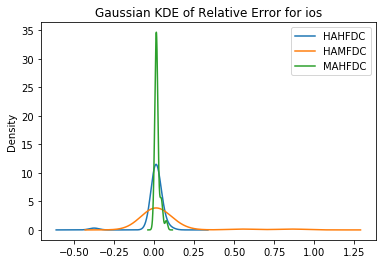

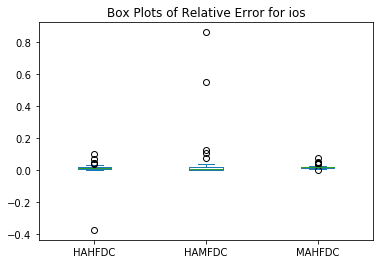

In [39]:
get_describe_table('ios')

/Users/gkosmach/miniconda-4.7.12/envs/emissioneval/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


android                      
             HAHFDC     HAMFDC     MAHFDC
count  4.200000e+01  32.000000  30.000000
mean   9.972969e-03   0.019699   0.024921
std    1.350288e-02   0.026258   0.041605
min   -2.690247e-16   0.000000   0.000000
25%    1.416310e-03   0.005687   0.004703
50%    4.074788e-03   0.009233   0.008595
75%    1.285617e-02   0.014781   0.024938
max    5.195321e-02   0.099596   0.191237

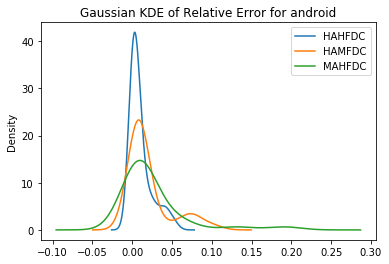

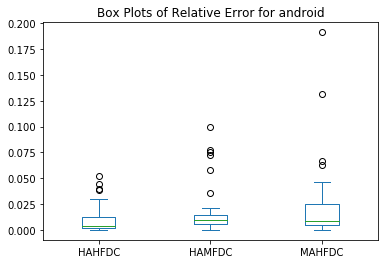

In [24]:
get_describe_table('android')

# JSON table 

In [ ]:
json.dumps(
    {"relative_distance_error": 
     {
         "ios_HAHF" : 
         {
             "lower" : ..., 
             "upper": ..., 
             "variance": ...
         }, 
         "ios_MAHF" : 
         {
             "lower" : ..., 
             "upper": ..., 
             "variance": ...
         }, 
         "android_HAHF" : 
         {
             "lower" : ..., 
             "upper": ..., 
             "variance": ...
         }, 
         "android_MAHF" : 
         {
             "lower" : ..., 
             "upper": ..., 
             "variance": ...
         }, 
     }
    }
)